In [1]:
%cd ..
import layers
from utils import *
from tqdm import tqdm

/home/daniil_artamonov/projects/smallworld_snn


## Инициализируем топологию
Параметры можно изменять в `topology_params`

In [24]:
topology_params = {'amount_neurons': 10, 'k_neighbours': 3,
                   'probability': 0.6, 'dtau': 0.01}

hidden_layer = layers.IntraConnectLayer(**topology_params)
hidden_layer.from_edges()

Количество двойных связей:  0.0


## Информация о топологии
У класса `IntraConnectLayer` есть 2 метода с помощью которых можно узнать как выглядит топология.

1) `IntraConnectLayer.draw_graph()` - граф связности (ничего не видно при количестве нейронов > 100). Параметры отрисовки можно изменить в родительском классе `HiddenLayer`
2) `IntraConnectLayer.get_connevtivity` - возвращает `pd.DataFrame` с информацией о связности нейронов (по факту - матрица весов)

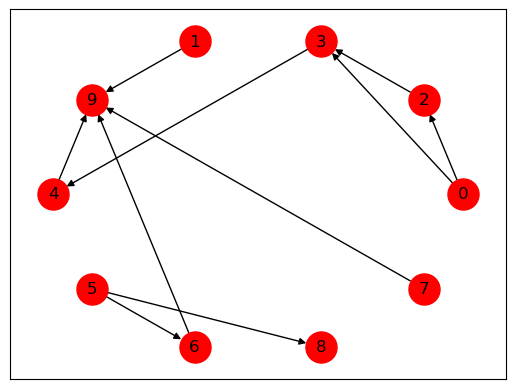

In [25]:
hidden_layer.draw_graph()

In [26]:
hidden_layer.get_connectivity()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,250.0,250.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0
2,0.0,0.0,0.0,250.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,250.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0
5,0.0,0.0,0.0,0.0,0.0,0.0,250.0,0.0,250.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Создаем серию входных спайков
Доступно несколько видов входных серий, выбрать другие можно изменив значение `'version'` в `generator_params`

In [27]:
generator_params = {'steps': 20000, 'version': '2'}

input_spikes = spike_generator(n=topology_params.get('amount_neurons'), **generator_params)

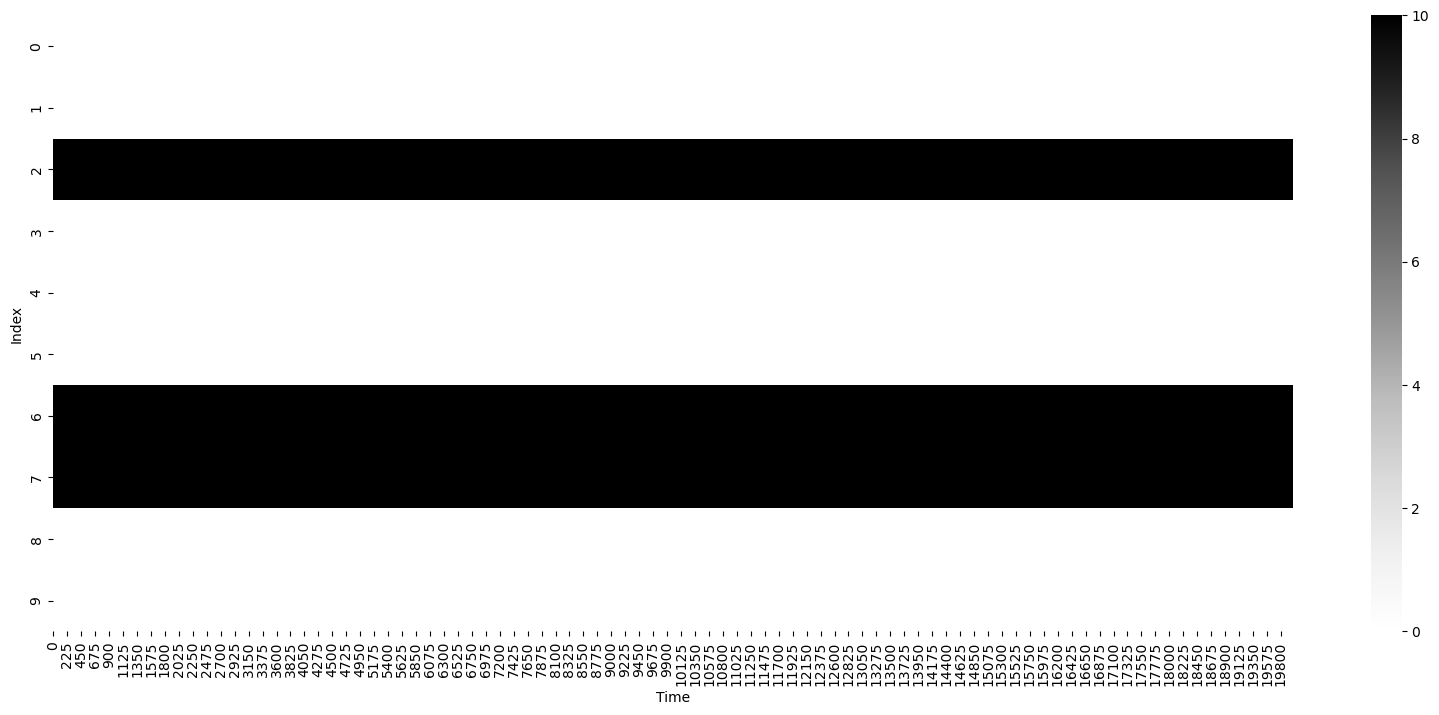

In [28]:
plot_inputs(input_spikes)

## Проход по сети

In [29]:
df = create_df(topology_params.get('amount_neurons'))  # Создаем датафрейм для сохранения результатов эпохи

In [30]:
for i in tqdm(range(len(input_spikes)), ascii=True, desc='forward'):
    out, mem = hidden_layer.intra_forward(input_spikes[i])  # Считаем выходные спайки и мембранный потенциал
    df.loc[len(df.index)] = input_spikes[i].tolist() + mem + out.tolist()  # Сохраняем в датафрейм

forward: 100%|##########| 20000/20000 [00:20<00:00, 959.49it/s] 


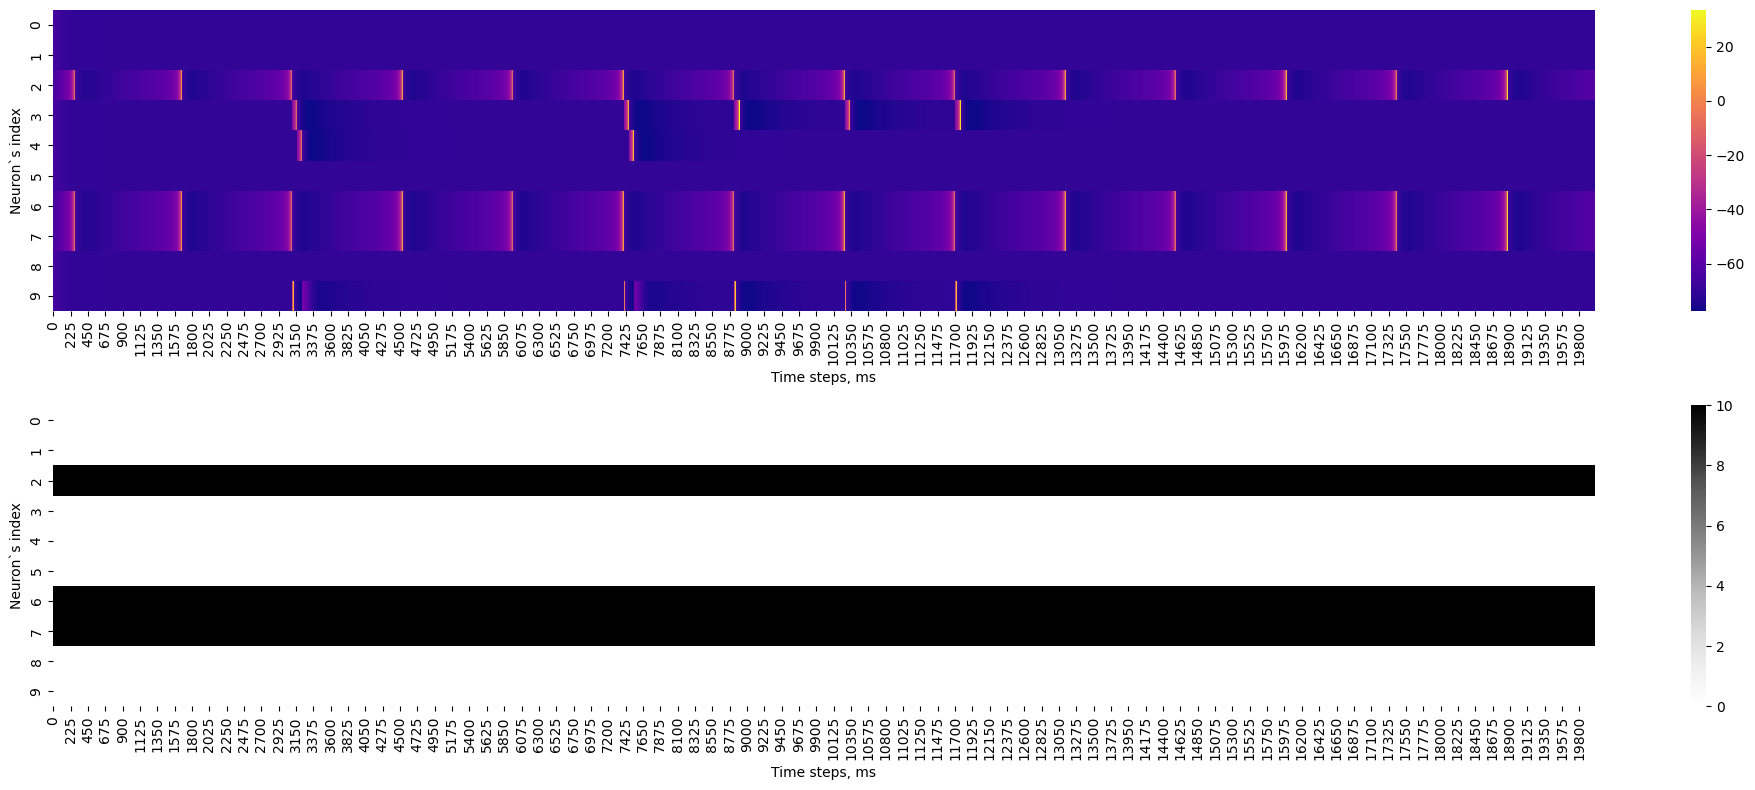

In [31]:
plot_heatmap(df)

In [20]:
df['out_spike_8'].value_counts()

out_spike_8
0.0     19992
10.0        8
Name: count, dtype: int64

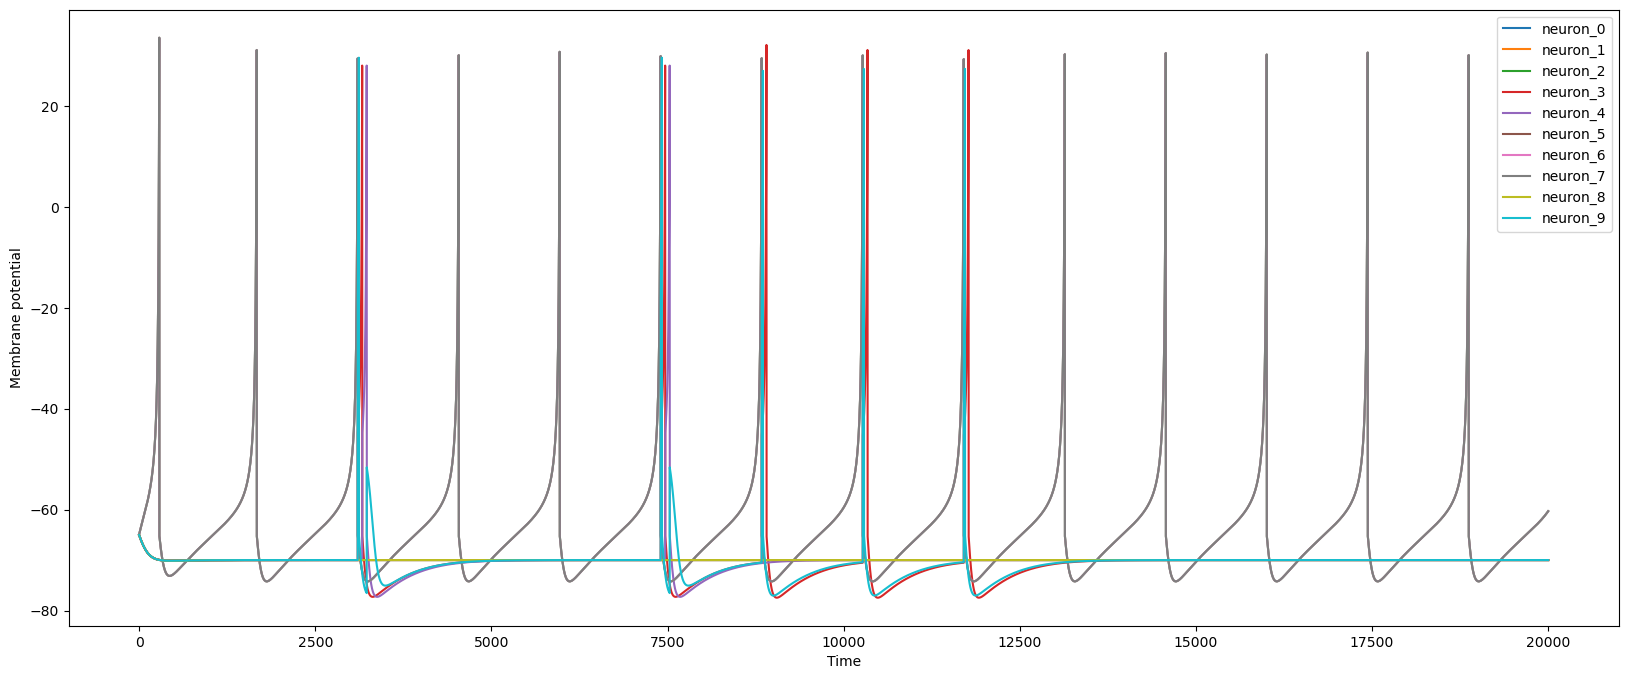

In [32]:
plot_mem(df)